In [1]:
import sys
print(sys.version)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram

3.8.1 (tags/v3.8.1:1b293b6006, Jan  6 2020, 11:40:25) 
[GCC 9.2.1 20191008]


[0.+0.j 0.+0.j 0.+0.j 1.-0.j]


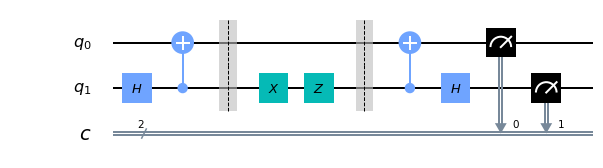

In [29]:
# Superdense Coding Circuit

amount_of_qbits = 2
amount_of_cbits = 2

INFORMATION = 3 # a number betwee 0 and 3, inclusive

# build the main circuit
circuit = QuantumCircuit(amount_of_qbits, amount_of_cbits)

# initialization - create a bell pair
circuit.h(1)
circuit.cnot(1,0)

circuit.barrier()

# encode information
## check LSB
if INFORMATION % 2:
    circuit.x(1)
## check higher bit
if INFORMATION >> 1:
    circuit.z(1)

circuit.barrier()

# decode information : un-entangle
circuit.cnot(1,0)
circuit.h(1)
a = circuit.measure([0,1], [0,1])

simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
outputstate = result.get_statevector(circuit, decimals=3)
print(outputstate)

# Draw the circuit
circuit.draw(output="mpl")
